# Práctica Deep Learning: Predicción precio Airbnb

## Importación de librerías y funciones necesarias

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None) #para que se muestren todas las filas en lugar de los ...
pd.set_option('display.max_columns', None) #para que se muestren todas las columnas en lugar de los ...

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

## Cargar Datos

Dividimos el dataset en train y test

In [5]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


## 1.Análisis Exploratorio

Usamos train para hacer el analisis

Como es dificil leer las columnas usamos la transpuesta

In [6]:
df.head().T

0  \
ID                                                                       17049274   
Listing Url                                 https://www.airbnb.com/rooms/17049274   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                                   Amazing 3bedroom apartment   
Summary                         This is an amazing big 3 bedroom apartment wit...   
Space                                                                         NaN   
Description                     This is an amazing big 3 bedroom apartment wit...   
Experiences Offered                                                          none   
Neighborhood Overview                                                         NaN   
Notes                                                                         NaN   
Transit                                                                       NaN   
Access                                                                        NaN   
Interaction                                                                   NaN   
House Rules                     - Quiet hours between 11 pm to 8 am. - Absolut...   
Thumbnail Url                   https://a0.muscache.com/im/pictures/0c212baf-c...   
Medium Url                      https://a0.muscache.com/im/pictures/0c212baf-c...   
Picture Url                     https://public.opendatasoft.com/api/v2/catalog...   
XL Picture Url                  https://a0.muscache.com/im/pictures/0c212baf-c...   
Host ID                                                                  11158986   
Host URL                               https://www.airbnb.com/users/show/11158986   
Host Name                                                                    Carl   
Host Since                                                             2014-01-09   
Host Location                                  Madrid, Community of Madrid, Spain   
Host About                      I am an architecture student who currently liv...   
Host Response Time                                                 within an hour   
Host Response Rate                                                            100   
Host Acceptance Rate                                                          NaN   
Host Thumbnail Url              https://a0.muscache.com/im/users/11158986/prof...   
Host Picture Url                https://a0.muscache.com/im/users/11158986/prof...   
Host Neighbourhood                                                    Embajadores   
Host Listings Count                                                             8   
Host Total Listings Count                                                       8   
Host Verifications                               email,phone,google,reviews,jumio   
Street                          Argüelles, Madrid, Comunidad de Madrid 28008, ...   
Neighbourhood                                                           Argüelles   
Neighbourhood Cleansed                                                  Argüelles   
Neighbourhood Group Cleansed                                    Moncloa - Aravaca   
City                                                                       Madrid   
State                                                         Comunidad de Madrid   
Zipcode                                                                     28008   
Market                                                                     Madrid   
Smart Location                                                      Madrid, Spain   
Country Code                                                                   ES   
Country                                                                     Spain   
Latitude                                                                  40.4243   
Longitude                                                                -3.71278   


Elimino con drop las columnas que no aportan información.

Datos irrelevantes (las que estan en '?' no estoy seguro):
    - ID
    - Listing Url	
    - Scrape ID
    - Last Scraped
    - Name ?
    - Summary ?
    - Space ? 
    - Description?
    - Neighborhood Overview	?
    - Notes ?
    - Transit ?
    - Access ?
    - Interaction ?
    - House Rules	?
    - Thumbnail Url
    - Medium Url
    - Picture Url
    - XL Picture Url
    - Host ID
    - Host URL
    - Host Name	
    - Host Since	?
    - Host Location	 ?
    - Host About	?
    - Host Thumbnail Url
    - Host Picture Url
    - Host Neighbourhood
    - Host Listings Count	
    - Host Total Listings Count	
    - Weekly Price	?
    - Monthly Price	?
    - Calendar Updated	
    - Calendar last Scraped	
    - First Review	
    - Last Review	
    - Review per Month ?
    - Geolocation
    - Calculated host listings count	
    - 
    
    

In [7]:
irrelevant_columns=['ID','Listing Url','Scrape ID','Last Scraped','Thumbnail Url','Medium Url','Picture Url','XL Picture Url'
         ,'Host ID','Host URL','Host Name','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Listings Count',
         'Host Total Listings Count','Calendar Updated','Calendar last Scraped','First Review','Last Review','Geolocation'
            ,'Calculated host listings count'
        ]
df.drop(irrelevant_columns,axis=1,inplace=True)

Elimino las columnas que aunque aportan información, son de texto libre y no son necesarias para este curso.

In [8]:
relevants_but_droppable_columns= ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About']
df.drop(relevants_but_droppable_columns,axis=1,inplace=True)

In [9]:
df.head().T

0  \
Experiences Offered                                                        none   
Host Since                                                           2014-01-09   
Host Response Time                                               within an hour   
Host Response Rate                                                          100   
Host Acceptance Rate                                                        NaN   
Host Verifications                             email,phone,google,reviews,jumio   
Street                        Argüelles, Madrid, Comunidad de Madrid 28008, ...   
Neighbourhood                                                         Argüelles   
Neighbourhood Cleansed                                                Argüelles   
Neighbourhood Group Cleansed                                  Moncloa - Aravaca   
City                                                                     Madrid   
State                                                       Comunidad de Madrid   
Zipcode                                                                   28008   
Market                                                                   Madrid   
Smart Location                                                    Madrid, Spain   
Country Code                                                                 ES   
Country                                                                   Spain   
Latitude                                                                40.4243   
Longitude                                                              -3.71278   
Property Type                                                         Apartment   
Room Type                                                       Entire home/apt   
Accommodates                                                                  8   
Bathrooms                                                                     1   
Bedrooms                                                                      3   
Beds                                                                          4   
Bed Type                                                               Real Bed   
Amenities                     Wireless Internet,Kitchen,Heating,Washer,Essen...   
Square Feet                                                                 NaN   
Price                                                                        90   
Weekly Price                                                                NaN   
Monthly Price                                                               NaN   
Security Deposit                                                            298   
Cleaning Fee                                                                 54   
Guests Included                                                               6   
Extra People                                                                  5   
Minimum Nights                                                                5   
Maximum Nights                                                             1125   
Has Availability                                                            NaN   
Availability 30                                                               0   
Availability 60                                                               1   
Availability 90                                                              24   
Availability 365                                                            299   
Number of Reviews                                                             0   
Review Scores Rating                                                        NaN   
Review Scores Accuracy                                                      NaN   
Review Scores Cleanliness                                                   NaN   
Review Scores Checkin                                                       NaN   
Review Scores Communication                                                 NaN   
Review Scor

In [10]:
df.shape

(11824, 55)

In [11]:
df.describe().T

count         mean          std         min  \
Host Response Rate           10344.0    94.834783    15.262278    0.000000   
Latitude                     11824.0    40.498922     4.653979  -37.851182   
Longitude                    11824.0    -3.811814    14.015336 -123.124429   
Accommodates                 11824.0     3.279093     2.102608    1.000000   
Bathrooms                    11775.0     1.285520     0.669190    0.000000   
Bedrooms                     11805.0     1.343753     0.900838    0.000000   
Beds                         11782.0     2.047700     1.619401    1.000000   
Square Feet                    479.0   392.104384   653.468664    0.000000   
Price                        11810.0    73.624301    72.589566    9.000000   
Weekly Price                  2881.0   376.140576   195.464376   70.000000   
Monthly Price                 2862.0  1424.915444  1254.584781  250.000000   
Security Deposit              5046.0   188.695204   115.590360    0.000000   
Cleaning Fee                  6993.0    31.775490    31.616877    0.000000   
Guests Included              11824.0     1.599543     1.203720    0.000000   
Extra People                 11824.0     7.742642    13.173421    0.000000   
Minimum Nights               11824.0     3.089648    13.456836    1.000000   
Maximum Nights               11824.0   879.390223  1925.218454    1.000000   
Availability 30              11824.0     8.931918     9.307032    0.000000   
Availability 60              11824.0    22.973782    19.690354    0.000000   
Availability 90              11824.0    39.866035    29.534612    0.000000   
Availability 365             11824.0   201.772497   127.827780    0.000000   
Number of Reviews            11824.0    22.693589    38.171283    0.000000   
Review Scores Rating          9224.0    91.744471     9.033571   20.000000   
Review Scores Accuracy        9206.0     9.418966     0.923061    2.000000   
Review Scores Cleanliness     9210.0     9.331922     0.992770    2.000000   
Review Scores Checkin         9197.0     9.623464     0.806877    2.000000   
Review Scores Communication   9211.0     9.649007     0.767997    2.000000   
Review Scores Location        9195.0     9.532681     0.779114    2.000000   
Review Scores Value           9195.0     9.222295     0.956847    2.000000   
Reviews per Month             9331.0     1.865760     1.860967    0.020000   

                                    25%          50%          75%  \
Host Response Rate           100.000000   100.000000   100.000000   
Latitude                      40.409724    40.419369    40.430965   
Longitude                     -3.707630    -3.700681    -3.683681   
Accommodates                   2.000000     3.000000     4.000000   
Bathrooms                      1.000000     1.000000     1.000000   
Bedrooms                       1.000000     1.000000     2.000000   
Beds                           1.000000     2.000000     2.000000   
Square Feet                    0.000000   100.000000   646.000000   
Price                         34.000000    56.000000    85.000000   
Weekly Price                 215.000000   350.000000   499.000000   
Monthly Price                733.250000  1200.000000  1727.750000   
Security Deposit             100.000000   150.000000   200.000000   
Cleaning Fee                  15.000000    25.000000    40.000000   
Guests Included                1.000000     1.000000     2.000000   
Extra People                   0.000000     0.000000    15.000000   
Minimum Nights                 1.000000     2.000000     3.000000   
Maximum Nights               365.000000  1125.000000  1125.000000   
Availability 30                0.000000     6.000000    14.000000   
Availability 60                4.000000    20.000000    38.000000   
Availability 90               12.000000    38.000000    65.000000   
Availability 365              78.000000   238.000000   319.000000   
Number of Reviews              1.000000     7.000000    27.000000   
Review Scores Rating     

Compruebo si hay columnas con un 20-30% missing. Para ello compruebo si hay columnas con NaN

In [12]:
df.isnull().any()

Experiences Offered             False
Host Since                       True
Host Response Time               True
Host Response Rate               True
Host Acceptance Rate             True
Host Verifications               True
Street                          False
Neighbourhood                    True
Neighbourhood Cleansed          False
Neighbourhood Group Cleansed     True
City                             True
State                            True
Zipcode                          True
Market                           True
Smart Location                  False
Country Code                    False
Country                          True
Latitude                        False
Longitude                       False
Property Type                   False
Room Type                       False
Accommodates                    False
Bathrooms                        True
Bedrooms                         True
Beds                             True
Bed Type                        False
Amenities   

In [13]:
#Compruebo cuantos valores NaN hay en cada una de las columnas
print("Elimino columnas NaN con menos del 20% - 30% del total (",20*len(df)/100, " - ", 30*len(df)/100,"):")


len(df)-df.count()



Elimino columnas NaN con menos del 20% - 30% del total ( 2364.8  -  3547.2 ):


Experiences Offered                 0
Host Since                          1
Host Response Time               1480
Host Response Rate               1480
Host Acceptance Rate            11793
Host Verifications                  5
Street                              0
Neighbourhood                    4162
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      821
City                                5
State                             118
Zipcode                           412
Market                             45
Smart Location                      0
Country Code                        0
Country                             1
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          49
Bedrooms                           19
Beds                               42
Bed Type                            0
Amenities   

In [14]:
#Aqui lo muestro en %
(len(df)-df.count())/len(df)*100

Experiences Offered              0.000000
Host Since                       0.008457
Host Response Time              12.516915
Host Response Rate              12.516915
Host Acceptance Rate            99.737821
Host Verifications               0.042287
Street                           0.000000
Neighbourhood                   35.199594
Neighbourhood Cleansed           0.000000
Neighbourhood Group Cleansed     6.943505
City                             0.042287
State                            0.997970
Zipcode                          3.484438
Market                           0.380582
Smart Location                   0.000000
Country Code                     0.000000
Country                          0.008457
Latitude                         0.000000
Longitude                        0.000000
Property Type                    0.000000
Room Type                        0.000000
Accommodates                     0.000000
Bathrooms                        0.414411
Bedrooms                         0

Vemos que hay columnas >30% de NaN:

Host Acceptance Rate, Neighbourhood, Square Feet, Weekly Price, Monthly Price, Security Deposit, Cleaning Fee, Has Availability, License, Jurisdiction Names 

In [15]:
columnas_mas30_NaN= ['Host Acceptance Rate', 'Neighbourhood', 'Square Feet', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names']
df.drop(columnas_mas30_NaN,axis=1,inplace=True)

In [16]:
df.head().T

0  \
Experiences Offered                                                        none   
Host Since                                                           2014-01-09   
Host Response Time                                               within an hour   
Host Response Rate                                                          100   
Host Verifications                             email,phone,google,reviews,jumio   
Street                        Argüelles, Madrid, Comunidad de Madrid 28008, ...   
Neighbourhood Cleansed                                                Argüelles   
Neighbourhood Group Cleansed                                  Moncloa - Aravaca   
City                                                                     Madrid   
State                                                       Comunidad de Madrid   
Zipcode                                                                   28008   
Market                                                                   Madrid   
Smart Location                                                    Madrid, Spain   
Country Code                                                                 ES   
Country                                                                   Spain   
Latitude                                                                40.4243   
Longitude                                                              -3.71278   
Property Type                                                         Apartment   
Room Type                                                       Entire home/apt   
Accommodates                                                                  8   
Bathrooms                                                                     1   
Bedrooms                                                                      3   
Beds                                                                          4   
Bed Type                                                               Real Bed   
Amenities                     Wireless Internet,Kitchen,Heating,Washer,Essen...   
Price                                                                        90   
Guests Included                                                               6   
Extra People                                                                  5   
Minimum Nights                                                                5   
Maximum Nights                                                             1125   
Availability 30                                                               0   
Availability 60                                                               1   
Availability 90                                                              24   
Availability 365                                                            299   
Number of Reviews                                                             0   
Review Scores Rating                                                        NaN   
Review Scores Accuracy                                                      NaN   
Review Scores Cleanliness                                                   NaN   
Review Scores Checkin                                                       NaN   
Review Scores Communication                                                 NaN   
Review Scores Location                                                      NaN   
Review Scores Value                                                         NaN   
Cancellation Policy                                                    flexible   
Reviews per Month                                                           NaN   
Features                      Host Has Profile Pic,Host Identity Verified,Is...   

                                                                              1  \
Experiences Offered                                                        none   
Host Since                                                           2016-01-12   
Host Respo

In [17]:
df.shape

(11824, 45)

In [18]:
#Vemos cuantos valores diferentes hay por cada columna
df.apply(lambda x: len(x.unique()))

Experiences Offered                 5
Host Since                       2065
Host Response Time                  5
Host Response Rate                 69
Host Verifications                195
Street                           1470
Neighbourhood Cleansed            444
Neighbourhood Group Cleansed       47
City                              228
State                              95
Zipcode                           547
Market                             41
Smart Location                    235
Country Code                       18
Country                            18
Latitude                        11824
Longitude                       11824
Property Type                      22
Room Type                           3
Accommodates                       16
Bathrooms                          18
Bedrooms                           11
Beds                               17
Bed Type                            5
Amenities                       10064
Price                             348
Guests Inclu

In [19]:
#Mirando el df.head().T Parece que los valores de la columna Experiences Offered son casi todos none en lugar de NaN
df["Experiences Offered"]

0            none
1            none
2            none
3            none
4            none
5            none
6            none
7            none
8            none
9            none
10           none
11           none
12           none
13           none
14           none
15           none
16           none
17           none
18           none
19           none
20           none
21           none
22           none
23           none
24           none
25           none
26           none
27           none
28           none
29           none
30           none
31           none
32           none
33           none
34           none
35           none
36           none
37           none
38           none
39           none
40           none
41           none
42           none
43           none
44           none
45           none
46           none
47           none
48           none
49           none
50           none
51           none
52           none
53           none
54           none
55        

In [20]:
df["Experiences Offered"].value_counts()

none        11809
business        7
social          3
romantic        3
family          2
Name: Experiences Offered, dtype: int64

In [21]:
df.drop(['Experiences Offered'], axis=1, inplace=True)

In [22]:
#Viendo la variable Street, veo que casi ninguno muestra las calles,
#más bien parece una combinación de diferentes columas como el barrio, estado, la ciudad y el zipcode. 
#Los cuales estan en las columnas de Neighbourhood Cleansed y Neighbourhood Group Cleansed , State, city y Zipcode

df["Street"].head()

0    Argüelles, Madrid, Comunidad de Madrid 28008, ...
1    L'Antiga Esquerra de l'Eixample, Barcelona, Ca...
2                   Alaró, Islas Baleares 07340, Spain
3     Cortes, Madrid, Comunidad de Madrid 28014, Spain
4    Arapiles, Madrid, Comunidad de Madrid 28015, S...
Name: Street, dtype: object

In [23]:
df.drop(['Street'], axis=1, inplace=True)

In [24]:
# Las columnas city, State, Market y Smart Location parece se refieren a lo mismo.
# Voy a comprobarlo

df.loc[:, ['City', 'State','Market','Smart Location']]

City                           State  \
0                                   Madrid             Comunidad de Madrid   
1                                Barcelona                       Catalunya   
2                                    Alaró                  Islas Baleares   
3                                   Madrid             Comunidad de Madrid   
4                                   Madrid             Comunidad de Madrid   
5                                   Madrid             Comunidad de Madrid   
6                                   Madrid             Comunidad de Madrid   
7                                   Madrid             Comunidad de Madrid   
8                                   Madrid             Comunidad de Madrid   
9                                  Londres                          London   
10                                  Madrid                          Madrid   
11                                  Madrid             Comunidad de Madrid   
12                                  Madrid             Community of Madrid   
13                                  Madrid             Comunidad de Madrid   
14                                  Madrid             Comunidad de Madrid   
15                                  Madrid             Comunidad de Madrid   
16                                 Toronto                              ON   
17                                  Madrid             Comunidad de Madrid   
18                                  Madrid             Comunidad de Madrid   
19                                  Madrid             Comunidad de Madrid   
20                                  Madrid             Comunidad de Madrid   
21                                  Madrid             Comunidad de Madrid   
22                                  Madrid             Comunidad de Madrid   
23                                  Madrid             Comunidad de Madrid   
24                                  Madrid             Comunidad de Madrid   
25                                  Madrid             Comunidad de Madrid   
26                                  Madrid             Comunidad de Madrid   
27                                  Madrid             Comunidad de Madrid   
28                                  Madrid             Comunidad de Madrid   
29                                  Madrid             Community of Madrid   
30                                  Madrid             Comunidad de Madrid   
31                                  Madrid             Comunidad de Madrid   
32                                  Madrid             Comunidad de Madrid   
33                                  Madrid             Community of Madrid   
34                                  Madrid             Comunidad de Madrid   
35                                  Madrid             Community of Madrid   
36                               Barcelona                       Catalunya   
37                                  Madrid             Comunidad de Madrid   
38                                   Palma                   Illes Balears   
39                                  Madrid             Comunidad de Madrid   
40                                  Madrid             Comunidad de Madrid   
41                                  Madrid             Comunidad de Madrid   
42                                  Madrid             Comunidad de Madrid   
43                               Barcelona                       Catalunya   
44                                  Madrid             Community of Madrid   
45                                  Madrid             Comunidad de Madrid   
46                                  Madrid             Comunidad de Madrid   
47                                  Madrid             Comunidad de Madrid   
48                                  Madrid             Community of Madrid   
49                                  Madrid             Community of Madrid   
50                                  Madrid             Comun

In [25]:
# City, State y Market tienen NaN y algunas son incluso números, por lo que me quedo con Smart Location
# Smart Location contiene el pais que está en la columna Country y Country Code, las elimino también

df.drop(['City', 'State', 'Market', 'Country', 'Country Code'], axis=1, inplace=True)

In [26]:
df.shape

(11824, 38)

## 1.1. Variables redundantes

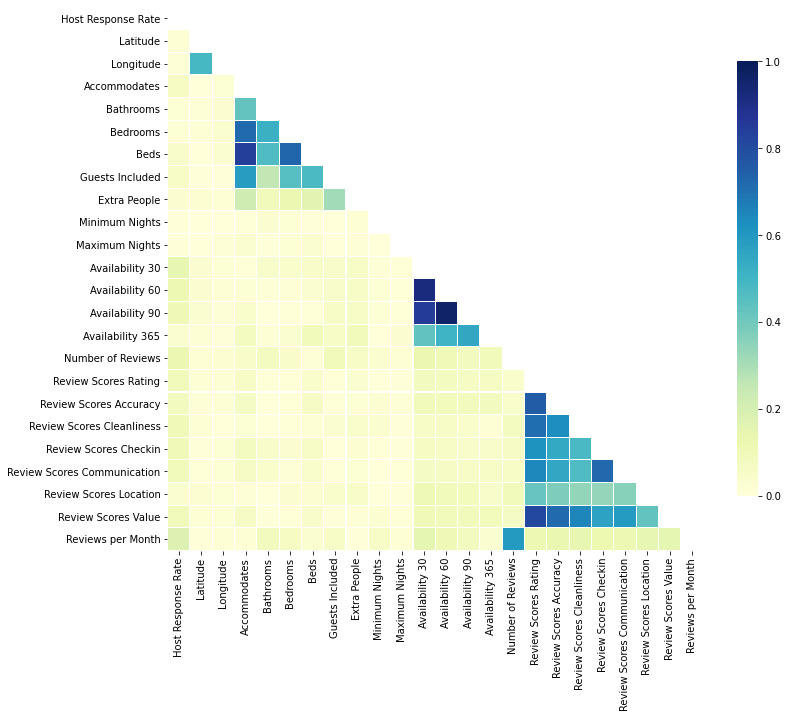

In [27]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Vemos que las variable Beds y Accommodates tienen mucha correlación. Eliminamos por ejemplo Accomodates.
Vemos que las variables Availability están muy relacionadas. Nos quedamos solo con la Availability 365 que es la que menos correlación tiene.
También las reviews están muy correlacionadas. Hago la media de todas las variables reviews.
Reviews per Month también la elimino ya que está muy correlacionada con el número de revisiones.


In [28]:
reviews = df.loc[: , "Review Scores Rating":"Review Scores Value"]
df['Average Review'] = reviews.mean(axis=1)

In [29]:
df.drop(['Accommodates','Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month'
        ], axis=1, inplace=True)

In [30]:
df.head().T

0  \
Host Since                                                           2014-01-09   
Host Response Time                                               within an hour   
Host Response Rate                                                          100   
Host Verifications                             email,phone,google,reviews,jumio   
Neighbourhood Cleansed                                                Argüelles   
Neighbourhood Group Cleansed                                  Moncloa - Aravaca   
Zipcode                                                                   28008   
Smart Location                                                    Madrid, Spain   
Latitude                                                                40.4243   
Longitude                                                              -3.71278   
Property Type                                                         Apartment   
Room Type                                                       Entire home/apt   
Bathrooms                                                                     1   
Bedrooms                                                                      3   
Beds                                                                          4   
Bed Type                                                               Real Bed   
Amenities                     Wireless Internet,Kitchen,Heating,Washer,Essen...   
Price                                                                        90   
Guests Included                                                               6   
Extra People                                                                  5   
Minimum Nights                                                                5   
Maximum Nights                                                             1125   
Availability 365                                                            299   
Number of Reviews                                                             0   
Cancellation Policy                                                    flexible   
Features                      Host Has Profile Pic,Host Identity Verified,Is...   
Average Review                                                              NaN   

                                                                              1  \
Host Since                                                           2016-01-12   
Host Response Time                                               within an hour   
Host Response Rate                                                           99   
Host Verifications                                    email,phone,reviews,jumio   
Neighbourhood Cleansed                                   la Dreta de l'Eixample   
Neighbourhood Group Cleansed                                           Eixample   
Zipcode                                                                   08008   
Smart Location                                                 Barcelona, Spain   
Latitude                                                                41.3929   
Longitude                                                                 2.158   
Property Type                                                         Apartment   
Room Type                                                       Entire home/apt   
Bathrooms                                                                     2   
Bedrooms                                                                      3   
Beds                                                                          5   
Bed Type                                                               Real Bed   
Amenities                     TV,Wireless Internet,Air conditioning,Elevator...   
Price                                                                       105   
Guests Included                                                               1   
Extra People                                                                  0   
Minimum Ni

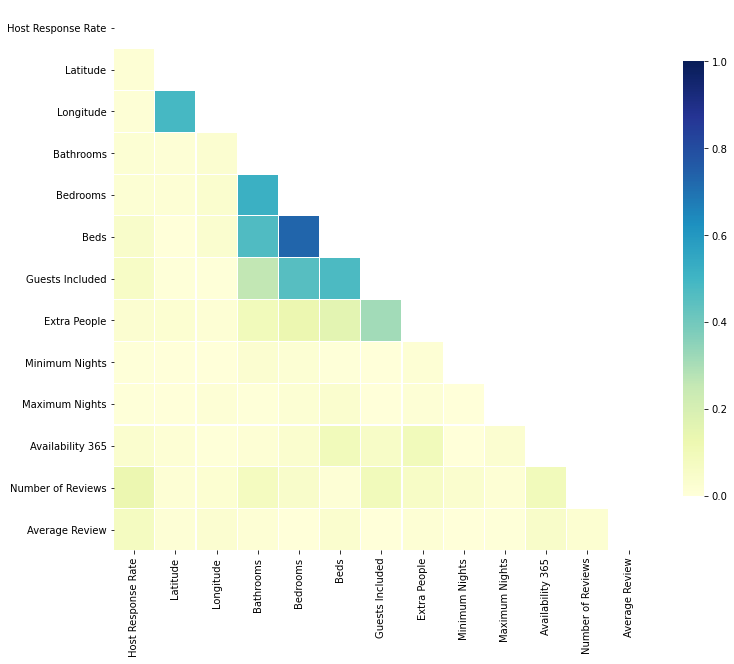

In [31]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [32]:
df.head().T

0  \
Host Since                                                           2014-01-09   
Host Response Time                                               within an hour   
Host Response Rate                                                          100   
Host Verifications                             email,phone,google,reviews,jumio   
Neighbourhood Cleansed                                                Argüelles   
Neighbourhood Group Cleansed                                  Moncloa - Aravaca   
Zipcode                                                                   28008   
Smart Location                                                    Madrid, Spain   
Latitude                                                                40.4243   
Longitude                                                              -3.71278   
Property Type                                                         Apartment   
Room Type                                                       Entire home/apt   
Bathrooms                                                                     1   
Bedrooms                                                                      3   
Beds                                                                          4   
Bed Type                                                               Real Bed   
Amenities                     Wireless Internet,Kitchen,Heating,Washer,Essen...   
Price                                                                        90   
Guests Included                                                               6   
Extra People                                                                  5   
Minimum Nights                                                                5   
Maximum Nights                                                             1125   
Availability 365                                                            299   
Number of Reviews                                                             0   
Cancellation Policy                                                    flexible   
Features                      Host Has Profile Pic,Host Identity Verified,Is...   
Average Review                                                              NaN   

                                                                              1  \
Host Since                                                           2016-01-12   
Host Response Time                                               within an hour   
Host Response Rate                                                           99   
Host Verifications                                    email,phone,reviews,jumio   
Neighbourhood Cleansed                                   la Dreta de l'Eixample   
Neighbourhood Group Cleansed                                           Eixample   
Zipcode                                                                   08008   
Smart Location                                                 Barcelona, Spain   
Latitude                                                                41.3929   
Longitude                                                                 2.158   
Property Type                                                         Apartment   
Room Type                                                       Entire home/apt   
Bathrooms                                                                     2   
Bedrooms                                                                      3   
Beds                                                                          5   
Bed Type                                                               Real Bed   
Amenities                     TV,Wireless Internet,Air conditioning,Elevator...   
Price                                                                       105   
Guests Included                                                               1   
Extra People                                                                  0   
Minimum Ni

Por último, podemos hacer una representación (scatter_plot) de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema.

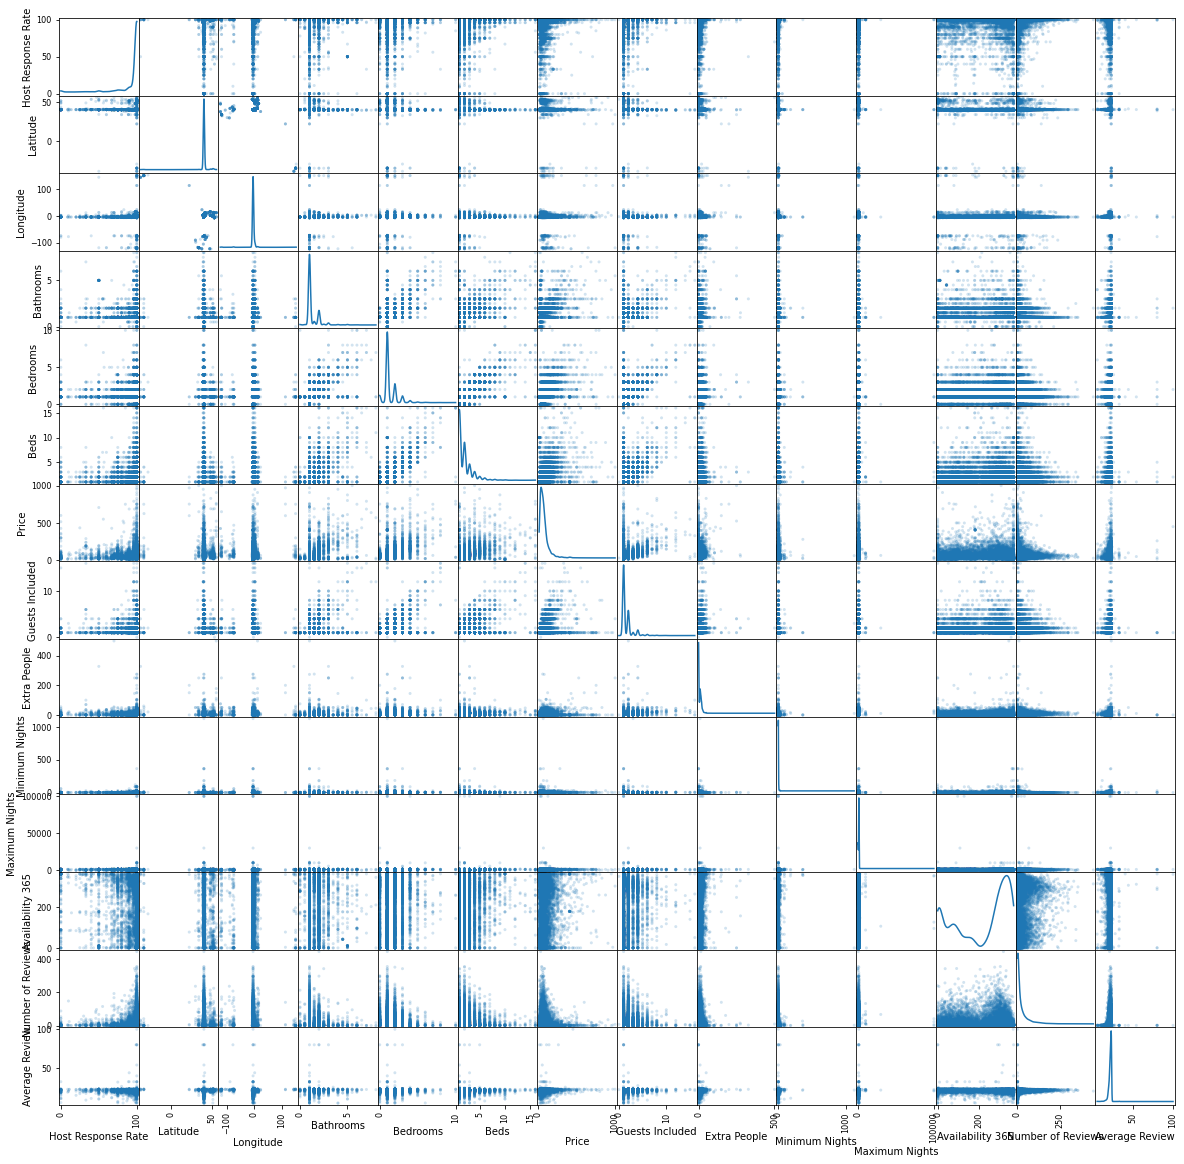

In [33]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

Dejo la longitud y latitud como únicas variables para representar la localización

In [34]:
# Voy a dejar latitude y longitude como únicas columnas que depende de la localización

df.drop(['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed'
         ,'Zipcode','Smart Location'
        ], axis=1, inplace=True)

In [35]:
df.head().T

0  \
Host Since                                                  2014-01-09   
Host Response Time                                      within an hour   
Host Response Rate                                                 100   
Host Verifications                    email,phone,google,reviews,jumio   
Latitude                                                       40.4243   
Longitude                                                     -3.71278   
Property Type                                                Apartment   
Room Type                                              Entire home/apt   
Bathrooms                                                            1   
Bedrooms                                                             3   
Beds                                                                 4   
Bed Type                                                      Real Bed   
Amenities            Wireless Internet,Kitchen,Heating,Washer,Essen...   
Price                                                               90   
Guests Included                                                      6   
Extra People                                                         5   
Minimum Nights                                                       5   
Maximum Nights                                                    1125   
Availability 365                                                   299   
Number of Reviews                                                    0   
Cancellation Policy                                           flexible   
Features             Host Has Profile Pic,Host Identity Verified,Is...   
Average Review                                                     NaN   

                                                                     1  \
Host Since                                                  2016-01-12   
Host Response Time                                      within an hour   
Host Response Rate                                                  99   
Host Verifications                           email,phone,reviews,jumio   
Latitude                                                       41.3929   
Longitude                                                        2.158   
Property Type                                                Apartment   
Room Type                                              Entire home/apt   
Bathrooms                                                            2   
Bedrooms                                                             3   
Beds                                                                 5   
Bed Type                                                      Real Bed   
Amenities            TV,Wireless Internet,Air conditioning,Elevator...   
Price                                                              105   
Guests Included                                                      1   
Extra People                                                         0   
Minimum Nights                                                       2   
Maximum Nights                                                    1125   
Availability 365                                                     1   
Number of Reviews                                                    1   
Cancellation Policy                                             strict   
Features             Host Has Profile Pic,Host Identity Verified,Is...   
Average Review                                                      80   

                                                                     2  \
Host Since                                                  2014-07-23   
Host Response Time                                      within an hour   
Host Response Rate                                                 100   
Host Verifications                  email,phone,facebook,reviews,jumio   
Latitude                                                       39.7076   
Longitude                                                      2.78774 

# 1.2. Outliers

In [36]:
# Según muestra la tabla, mirando mean, min and max, 
# pueden tener outliers Bathrooms, Bedrooms, Price, Extra People

df.describe().T

count        mean          std         min         25%  \
Host Response Rate  10344.0   94.834783    15.262278    0.000000  100.000000   
Latitude            11824.0   40.498922     4.653979  -37.851182   40.409724   
Longitude           11824.0   -3.811814    14.015336 -123.124429   -3.707630   
Bathrooms           11775.0    1.285520     0.669190    0.000000    1.000000   
Bedrooms            11805.0    1.343753     0.900838    0.000000    1.000000   
Beds                11782.0    2.047700     1.619401    1.000000    1.000000   
Price               11810.0   73.624301    72.589566    9.000000   34.000000   
Guests Included     11824.0    1.599543     1.203720    0.000000    1.000000   
Extra People        11824.0    7.742642    13.173421    0.000000    0.000000   
Minimum Nights      11824.0    3.089648    13.456836    1.000000    1.000000   
Maximum Nights      11824.0  879.390223  1925.218454    1.000000  365.000000   
Availability 365    11824.0  201.772497   127.827780    0.000000   78.000000   
Number of Reviews   11824.0   22.693589    38.171283    0.000000    1.000000   
Average Review       9224.0   21.286414     2.478547    4.857143   20.571429   

                            50%          75%           max  
Host Response Rate   100.000000   100.000000    100.000000  
Latitude              40.419369    40.430965     55.956716  
Longitude             -3.700681    -3.683681    153.371427  
Bathrooms              1.000000     1.000000      8.000000  
Bedrooms               1.000000     2.000000     10.000000  
Beds                   2.000000     2.000000     16.000000  
Price                 56.000000    85.000000    999.000000  
Guests Included        1.000000     2.000000     16.000000  
Extra People           0.000000    15.000000    500.000000  
Minimum Nights         2.000000     3.000000   1125.000000  
Maximum Nights      1125.000000  1125.000000  99999.000000  
Availability 365     238.000000   319.000000    365.000000  
Number of Reviews      7.000000    27.000000    446.000000  
Average Review        21.714286    22.428571    100.000000

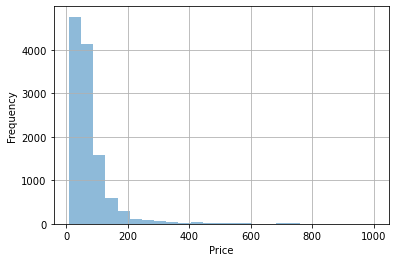

In [37]:
df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.show()

In [38]:
len(df[df['Price'] > 200])

454

In [39]:
df = df[df['Price'] <= 200]

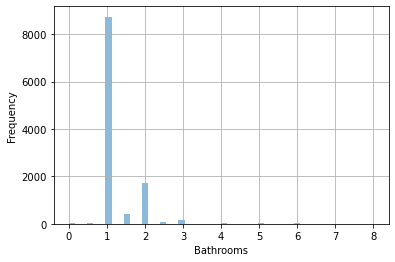

In [40]:
df['Bathrooms'].plot.hist(alpha=0.5, bins=50, grid = True)
plt.xlabel('Bathrooms')

plt.show()

In [41]:
len(df[df['Bathrooms'] > 5])

20

In [42]:
df = df[df['Bathrooms'] <= 5]

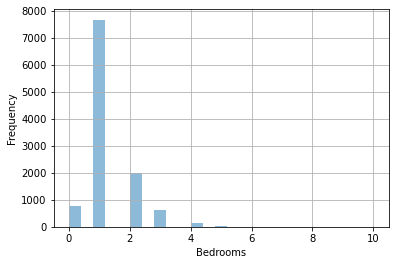

In [43]:
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.show()

In [44]:
len(df[df['Bedrooms'] > 6])

1

In [45]:
df = df[df['Bedrooms'] <= 6]

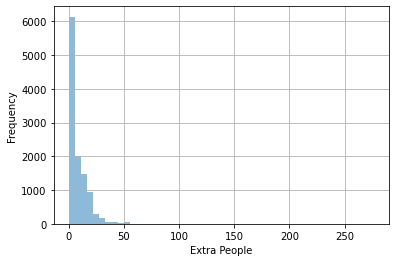

In [46]:
df['Extra People'].plot.hist(alpha=0.5, bins=50, grid = True)
plt.xlabel('Extra People')

plt.show()

In [47]:
len(df[df['Extra People'] > 50])

29

In [48]:
df = df[df['Extra People'] <= 50]

# 2. Generación de Características

In [49]:
df.head().T

0  \
Host Since                                                  2014-01-09   
Host Response Time                                      within an hour   
Host Response Rate                                                 100   
Host Verifications                    email,phone,google,reviews,jumio   
Latitude                                                       40.4243   
Longitude                                                     -3.71278   
Property Type                                                Apartment   
Room Type                                              Entire home/apt   
Bathrooms                                                            1   
Bedrooms                                                             3   
Beds                                                                 4   
Bed Type                                                      Real Bed   
Amenities            Wireless Internet,Kitchen,Heating,Washer,Essen...   
Price                                                               90   
Guests Included                                                      6   
Extra People                                                         5   
Minimum Nights                                                       5   
Maximum Nights                                                    1125   
Availability 365                                                   299   
Number of Reviews                                                    0   
Cancellation Policy                                           flexible   
Features             Host Has Profile Pic,Host Identity Verified,Is...   
Average Review                                                     NaN   

                                                                     1  \
Host Since                                                  2016-01-12   
Host Response Time                                      within an hour   
Host Response Rate                                                  99   
Host Verifications                           email,phone,reviews,jumio   
Latitude                                                       41.3929   
Longitude                                                        2.158   
Property Type                                                Apartment   
Room Type                                              Entire home/apt   
Bathrooms                                                            2   
Bedrooms                                                             3   
Beds                                                                 5   
Bed Type                                                      Real Bed   
Amenities            TV,Wireless Internet,Air conditioning,Elevator...   
Price                                                              105   
Guests Included                                                      1   
Extra People                                                         0   
Minimum Nights                                                       2   
Maximum Nights                                                    1125   
Availability 365                                                     1   
Number of Reviews                                                    1   
Cancellation Policy                                             strict   
Features             Host Has Profile Pic,Host Identity Verified,Is...   
Average Review                                                      80   

                                                                     2  \
Host Since                                                  2014-07-23   
Host Response Time                                      within an hour   
Host Response Rate                                                 100   
Host Verifications                  email,phone,facebook,reviews,jumio   
Latitude                                                       39.7076   
Longitude                                                      2.78774 

#### Primera creación de características:

Host Verifications, Amenities y Features exigirían un análisis NLP, pero hay información directa que se puede extraer. Todas son listas, separadas por comas. Se puede contar el número de elementos en cada lista y usarlo como característica.

In [50]:
df_l = df[['Features', 'Amenities', 'Host Verifications']]
df_l.fillna("", inplace=True) # rellenamos los huecos con cadenas vacías

df_l['Features'] = df_l['Features'].apply(lambda x: len(str(x).split(',')))
df_l['Amenities'] = df_l['Amenities'].apply(lambda x: len(str(x).split(',')))
df_l['Host Verifications'] = df_l['Host Verifications'].apply(lambda x: len(str(x).split(',')))

df_l.head(10)

Features  Amenities  Host Verifications
0         4          9                   5
1         5          8                   4
2         3         22                   5
3         5         16                   4
4         4         22                   4
5         4         14                   3
6         4          8                   4
7         3         18                   3
8         4         22                   6
9         3          2                   3

Aplicamos al dataset original

In [51]:
df['Features'].fillna("", inplace=True)
df['Amenities'].fillna("", inplace=True)
df['Host Verifications'].fillna("", inplace=True)

df['Features'] = df['Features'].apply(lambda x: len(str(x).split(',')))
df['Amenities'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))
df['Host Verifications'] = df['Host Verifications'].apply(lambda x: len(str(x).split(',')))

In [52]:
df.head().T

0                1                2  \
Host Since                2014-01-09       2016-01-12       2014-07-23   
Host Response Time    within an hour   within an hour   within an hour   
Host Response Rate               100               99              100   
Host Verifications                 5                4                5   
Latitude                     40.4243          41.3929          39.7076   
Longitude                   -3.71278            2.158          2.78774   
Property Type              Apartment        Apartment        Apartment   
Room Type            Entire home/apt  Entire home/apt  Entire home/apt   
Bathrooms                          1                2                1   
Bedrooms                           3                3                2   
Beds                               4                5                3   
Bed Type                    Real Bed         Real Bed         Real Bed   
Amenities                          9                8               22   
Price                             90              105              100   
Guests Included                    6                1                2   
Extra People                       5                0               10   
Minimum Nights                     5                2                1   
Maximum Nights                  1125             1125             1125   
Availability 365                 299                1              298   
Number of Reviews                  0                1               23   
Cancellation Policy         flexible           strict         moderate   
Features                           4                5                3   
Average Review                   NaN               80               21   

                                   3                   4  
Host Since                2012-07-08          2016-01-04  
Host Response Time    within an hour  within a few hours  
Host Response Rate               100                 100  
Host Verifications                 4                   4  
Latitude                     40.4121             40.4341  
Longitude                   -3.69354            -3.70641  
Property Type              Apartment           Apartment  
Room Type            Entire home/apt        Private room  
Bathrooms                          1                   1  
Bedrooms                           1                   1  
Beds                               2                   1  
Bed Type                    Real Bed       Pull-out Sofa  
Amenities                         16                  22  
Price                             77                  20  
Guests Included                    2                   1  
Extra People                      15                  10  
Minimum Nights                     1                   3  
Maximum Nights                  1125                1125  
Availability 365                  98                  33  
Number of Reviews                148                  23  
Cancellation Policy           strict              strict  
Features                           5                   4  
Average Review               22.5714                  21

#### Tercera generación de características
Antigüedad del dueño en la plataforma

In [53]:
from datetime import datetime

df.dropna(subset=['Host Since'], inplace=True)

df['Host Since'] = df['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df['Years Being Host'] = df['Host Since'].apply(lambda x: 2017 - x.year)

df.drop(['Host Since'], axis=1, inplace=True)

In [54]:
df.head().T

0                1                2  \
Host Response Time    within an hour   within an hour   within an hour   
Host Response Rate               100               99              100   
Host Verifications                 5                4                5   
Latitude                     40.4243          41.3929          39.7076   
Longitude                   -3.71278            2.158          2.78774   
Property Type              Apartment        Apartment        Apartment   
Room Type            Entire home/apt  Entire home/apt  Entire home/apt   
Bathrooms                          1                2                1   
Bedrooms                           3                3                2   
Beds                               4                5                3   
Bed Type                    Real Bed         Real Bed         Real Bed   
Amenities                          9                8               22   
Price                             90              105              100   
Guests Included                    6                1                2   
Extra People                       5                0               10   
Minimum Nights                     5                2                1   
Maximum Nights                  1125             1125             1125   
Availability 365                 299                1              298   
Number of Reviews                  0                1               23   
Cancellation Policy         flexible           strict         moderate   
Features                           4                5                3   
Average Review                   NaN               80               21   
Years Being Host                   3                1                3   

                                   3                   4  
Host Response Time    within an hour  within a few hours  
Host Response Rate               100                 100  
Host Verifications                 4                   4  
Latitude                     40.4121             40.4341  
Longitude                   -3.69354            -3.70641  
Property Type              Apartment           Apartment  
Room Type            Entire home/apt        Private room  
Bathrooms                          1                   1  
Bedrooms                           1                   1  
Beds                               2                   1  
Bed Type                    Real Bed       Pull-out Sofa  
Amenities                         16                  22  
Price                             77                  20  
Guests Included                    2                   1  
Extra People                      15                  10  
Minimum Nights                     1                   3  
Maximum Nights                  1125                1125  
Availability 365                  98                  33  
Number of Reviews                148                  23  
Cancellation Policy           strict              strict  
Features                           5                   4  
Average Review               22.5714                  21  
Years Being Host                   5                   1

# 3. Categorización de variables

In [55]:
#Compruebo las columnas que hay de tipo object
df.dtypes

Host Response Time      object
Host Response Rate     float64
Host Verifications       int64
Latitude               float64
Longitude              float64
Property Type           object
Room Type               object
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type                object
Amenities                int64
Price                  float64
Guests Included          int64
Extra People             int64
Minimum Nights           int64
Maximum Nights           int64
Availability 365         int64
Number of Reviews        int64
Cancellation Policy     object
Features                 int64
Average Review         float64
Years Being Host         int64
dtype: object

In [56]:
list(df.select_dtypes(include=['object']).columns)

['Host Response Time',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

In [57]:
print(f"Registros con cero baños: {len(df[df['Bathrooms'] == 0])}")
print(f"Registros con precio cero: {len(df[df['Price'] == 0])}")

Registros con cero baños: 50
Registros con precio cero: 0


In [58]:
df = df[df['Bathrooms'] != 0]

In [59]:
# Comprobamos cuántos valores distintos tiene cada una de las columnas de tipo object
df_nn = df[list(df.select_dtypes(include=['object']).columns)]
df_nn.apply(lambda x: len(x.unique()))

Host Response Time      5
Property Type          22
Room Type               3
Bed Type                5
Cancellation Policy     8
dtype: int64

In [60]:
df['Host Response Time'].isnull().any()

True

In [61]:
# Comprobamos cuántos valores nulos hay
len(df_nn) - df_nn.count()

Host Response Time     1348
Property Type             0
Room Type                 0
Bed Type                  0
Cancellation Policy       0
dtype: int64

In [62]:
#Solo Host Response Time tiene valores nulos
df_nn["Host Response Time"].value_counts()

within an hour        6068
within a few hours    2213
within a day          1335
a few days or more     228
Name: Host Response Time, dtype: int64

In [63]:
#Rellenamos los valores NaN de Host Response Time con el valor más frecuente
df["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)

In [64]:
categorical = ['Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy'
]

# Creamos un dict para usarlo después en test
mean_map = {}
for c in categorical:
    mean = df.groupby(c)['Price'].mean()
    df[c] = df[c].map(mean)    
    mean_map[c] = mean

In [65]:
mean_map

{'Host Response Time': Host Response Time
 a few days or more    58.061404
 within a day          61.364794
 within a few hours    62.131044
 within an hour        63.446467
 Name: Price, dtype: float64,
 'Property Type': Property Type
 Apartment              63.667757
 Bed & Breakfast        36.908745
 Boat                  102.000000
 Boutique hotel         55.000000
 Bungalow               56.000000
 Camper/RV              58.000000
 Casa particular        39.500000
 Chalet                 62.894737
 Condominium            58.273050
 Dorm                   33.354839
 Earth House            21.000000
 Guest suite            18.666667
 Guesthouse             43.228571
 Hostel                 43.400000
 House                  63.705623
 Loft                   71.690083
 Other                  58.274725
 Serviced apartment     65.000000
 Tent                   25.000000
 Timeshare              20.000000
 Townhouse              69.727273
 Villa                 145.000000
 Name: Price, dt

In [66]:
# Rellenamos los valores NaNs con la media de las columnas numéricas

# Esto solo sirve para mover price a la primera posición
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df = df[cols]

df.fillna(df.mean(), inplace=True)

In [67]:
df.isnull().any()

Price                  False
Host Response Time     False
Host Response Rate     False
Host Verifications     False
Latitude               False
Longitude              False
Property Type          False
Room Type              False
Bathrooms              False
Bedrooms               False
Beds                   False
Bed Type               False
Amenities              False
Guests Included        False
Extra People           False
Minimum Nights         False
Maximum Nights         False
Availability 365       False
Number of Reviews      False
Cancellation Policy    False
Features               False
Average Review         False
Years Being Host       False
dtype: bool

In [68]:
df.describe().T

count        mean          std         min         25%  \
Price                11192.0   62.828360    38.983761    9.000000   32.000000   
Host Response Time   11192.0   62.828360     1.033357   58.061404   62.131044   
Host Response Rate   11192.0   94.885006    14.107157    0.000000   94.885006   
Host Verifications   11192.0    4.131076     1.269886    1.000000    3.000000   
Latitude             11192.0   40.514331     4.385755  -37.851182   40.409763   
Longitude            11192.0   -3.871622    13.195909 -123.124429   -3.707599   
Property Type        11192.0   62.828360     5.218409   18.666667   63.667757   
Room Type            11192.0   62.828360    23.804307   26.933333   33.809568   
Bathrooms            11192.0    1.231594     0.518896    0.500000    1.000000   
Bedrooms             11192.0    1.273767     0.759956    0.000000    1.000000   
Beds                 11192.0    1.939735     1.391454    1.000000    1.000000   
Bed Type             11192.0   62.828360     1.810533   40.970588   63.085032   
Amenities            11192.0   14.298964     4.696543    1.000000   11.000000   
Guests Included      11192.0    1.557898     1.039755    0.000000    1.000000   
Extra People         11192.0    7.257773     9.036327    0.000000    0.000000   
Minimum Nights       11192.0    2.994728    13.302763    1.000000    1.000000   
Maximum Nights       11192.0  878.531183  1976.174281    1.000000  365.000000   
Availability 365     11192.0  200.181826   128.048470    0.000000   75.000000   
Number of Reviews    11192.0   23.309864    38.500840    0.000000    1.000000   
Cancellation Policy  11192.0   62.828360     7.125457   54.193820   54.193820   
Features             11192.0    3.736776     1.050445    1.000000    3.000000   
Average Review       11192.0   21.271989     2.016102    4.857143   21.000000   
Years Being Host     11192.0    2.765904     1.639383    0.000000    1.000000   

                             50%          75%           max  
Price                  55.000000    80.000000    200.000000  
Host Response Time     63.446467    63.446467     63.446467  
Host Response Rate    100.000000   100.000000    100.000000  
Host Verifications      4.000000     5.000000     10.000000  
Latitude               40.419193    40.430751     55.956716  
Longitude              -3.700859    -3.685722    153.371427  
Property Type          63.667757    63.667757    145.000000  
Room Type              82.177999    82.177999     82.177999  
Bathrooms               1.000000     1.000000      5.000000  
Bedrooms                1.000000     2.000000      6.000000  
Beds                    1.000000     2.000000     16.000000  
Bed Type               63.085032    63.085032     63.085032  
Amenities              14.000000    17.000000     42.000000  
Guests Included         1.000000     2.000000     16.000000  
Extra People            0.000000    14.000000     50.000000  
Minimum Nights          2.000000     3.000000   1125.000000  
Maximum Nights       1125.000000  1125.000000  99999.000000  
Availability 365      234.500000   318.000000    365.000000  
Number of Reviews       7.000000    28.000000    446.000000  
Cancellation Policy    61.653172    70.555529     98.000000  
Features                4.000000     4.000000      8.000000  
Average Review         21.271989    22.285714     80.000000  
Years Being Host        3.000000     4.000000      8.000000

# 4. Construcción y validación del modelo

In [69]:
from sklearn import preprocessing
data = df.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: -689.683
best parameters: {'alpha': 0.05796393953384967}


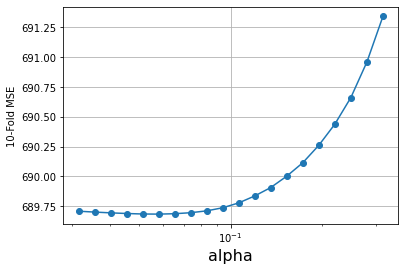

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

#alpha_vector = np.logspace(-3,4,20)
alpha_vector = np.logspace(-1.5,-0.5,20)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.grid()
plt.show()

In [71]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

irrelevant_columns=['ID','Listing Url','Scrape ID','Last Scraped','Thumbnail Url','Medium Url','Picture Url','XL Picture Url'
         ,'Host ID','Host URL','Host Name','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Listings Count',
         'Host Total Listings Count','Calendar Updated','Calendar last Scraped','First Review','Last Review','Geolocation'
            ,'Calculated host listings count'
        ]

relevants_but_droppable_columns= ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About']

columnas_mas30_NaN= ['Host Acceptance Rate', 'Neighbourhood', 'Square Feet', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names']

df_test.drop(irrelevant_columns, axis=1, inplace=True)
df_test.drop(relevants_but_droppable_columns, axis=1, inplace=True)
df_test.drop(columnas_mas30_NaN, axis=1, inplace=True)

df_test.drop(['Experiences Offered'], axis=1, inplace=True)
df_test.drop(['Street'], axis=1, inplace=True)
df_test.drop(['City', 'State', 'Market', 'Country', 'Country Code'], axis=1, inplace=True)

reviews = df_test.loc[: , "Review Scores Rating":"Review Scores Value"]
df_test['Average Review'] = reviews.mean(axis=1)

df_test.drop(['Accommodates','Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month'
        ], axis=1, inplace=True)

df_test.drop(['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed'
         ,'Zipcode','Smart Location'
        ], axis=1, inplace=True)

df_test = df_test[df_test['Price'] <= 200]
df_test = df_test[df_test['Bathrooms'] <= 5]
df_test = df_test[df_test['Bedrooms'] <= 6]
df_test = df_test[df_test['Extra People'] <= 50]

df_test['Features'].fillna("", inplace=True) # rellenamos los huecos con cadenas vacías
df_test['Amenities'].fillna("", inplace=True)
df_test['Host Verifications'].fillna("", inplace=True)

df_test['Features'] = df_test['Features'].apply(lambda x: len(str(x).split(',')))
df_test['Amenities'] = df_test['Amenities'].apply(lambda x: len(str(x).split(',')))
df_test['Host Verifications'] = df_test['Host Verifications'].apply(lambda x: len(str(x).split(',')))

df_test.dropna(subset=['Host Since'], inplace=True)
df_test['Host Since'] = df_test['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_test['Years Being Host'] = df_test['Host Since'].apply(lambda x: 2017 - x.year)
df_test.drop(['Host Since'], axis=1, inplace=True)

df_test = df_test[df_test['Bathrooms'] != 0]


df_test["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)

categorical = ['Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy'
]

# Categorizamos con los datos de train!
for c in categorical:
    df_test[c] = df_test[c].map(mean_map[c])

# Comprobamos que no quedan valores no numéricos
df[categorical].dtypes

Host Response Time     float64
Property Type          float64
Room Type              float64
Bed Type               float64
Cancellation Policy    float64
dtype: object